In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 90)

### Data Imports from csv

In [3]:

so_data_2022 = pd.read_csv(
    'C:/Users/Roy Waswa/Documents/DEV/SO_DATA/so-survey-2022/survey_results_public.csv')

In [4]:
criteria_2022 = ['MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities','YearsCode', 'YearsCodePro', 'Age', 'Gender','PurchaseInfluence', 'Country', 'Currency',
       'CompTotal']
so_data_2022 = so_data_2022[criteria_2022]

In [5]:
remove_non_devs = so_data_2022['MainBranch'] == 'None of these'
remove_unemployed = so_data_2022['Employment'].str.contains('Employed')
remove_no_comp = so_data_2022['CompTotal'].isna()
remove_null_age = so_data_2022['Age'].isna()
remove_spam_comp = so_data_2022['CompTotal'] <= 500000
clean_so_data_2022 = so_data_2022[
    ~remove_non_devs & remove_unemployed & ~remove_no_comp & remove_spam_comp &~remove_null_age ]

In [7]:
clean_so_data_2022.to_csv('./export/clean_2022.csv')

### Age against compensation data

In [8]:
age_brackets = clean_so_data_2022['Age']
age_sets = ['18-24 years old','25-34 years old','35-44 years old','45-54 years old','55-64 years old']
age_dict = {
    'Age':[],
    'Population':[],
    'AvgComp':[]
}
for age in age_sets:
    Population = clean_so_data_2022[age_brackets.str.contains(age)]
    age_dict['Age'].append(age)
    age_dict['Population'].append(Population.shape[0])
    age_dict['AvgComp'].append(np.round(Population['CompTotal'].mean(), 0))
age_comp_df = pd.DataFrame(data=age_dict, columns=['Age','Population','AvgComp'])
age_comp_df

,Age,Population,AvgComp
0,18-24 years old,4146,63851.0
1,25-34 years old,15777,84426.0
2,35-44 years old,8181,102946.0
3,45-54 years old,2695,111807.0
4,55-64 years old,903,120062.0


## Graph of compensation against age

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.style.use('ggplot')
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [11]:
age_axis = age_comp_df['Age'].array
population = age_comp_df['Population'].array
comp = age_comp_df['AvgComp'].array

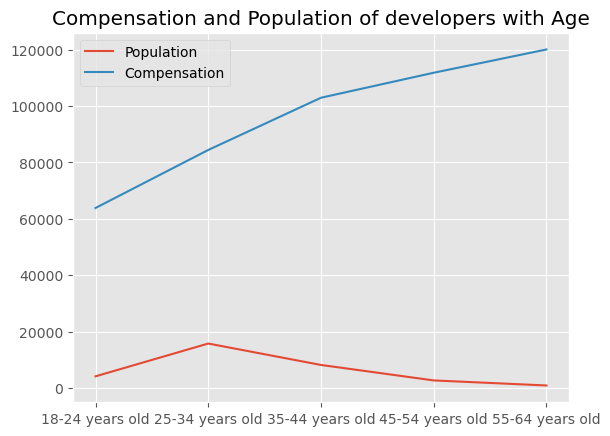

In [12]:
plt.plot(age_axis,population, label='Population')
plt.plot(age_axis,comp, label='Compensation')

plt.title('Compensation and Population of developers with Age')
plt.legend()